In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from keras.datasets import mnist

In [3]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
ytrain.shape

(60000,)

In [6]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

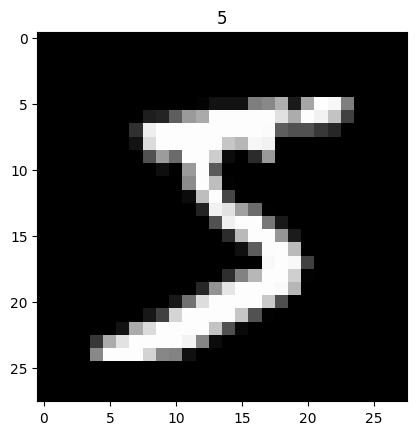

In [8]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0],cmap='gray')
plt.title(ytrain[0])
plt.show()

#### Plotting top 9 figures

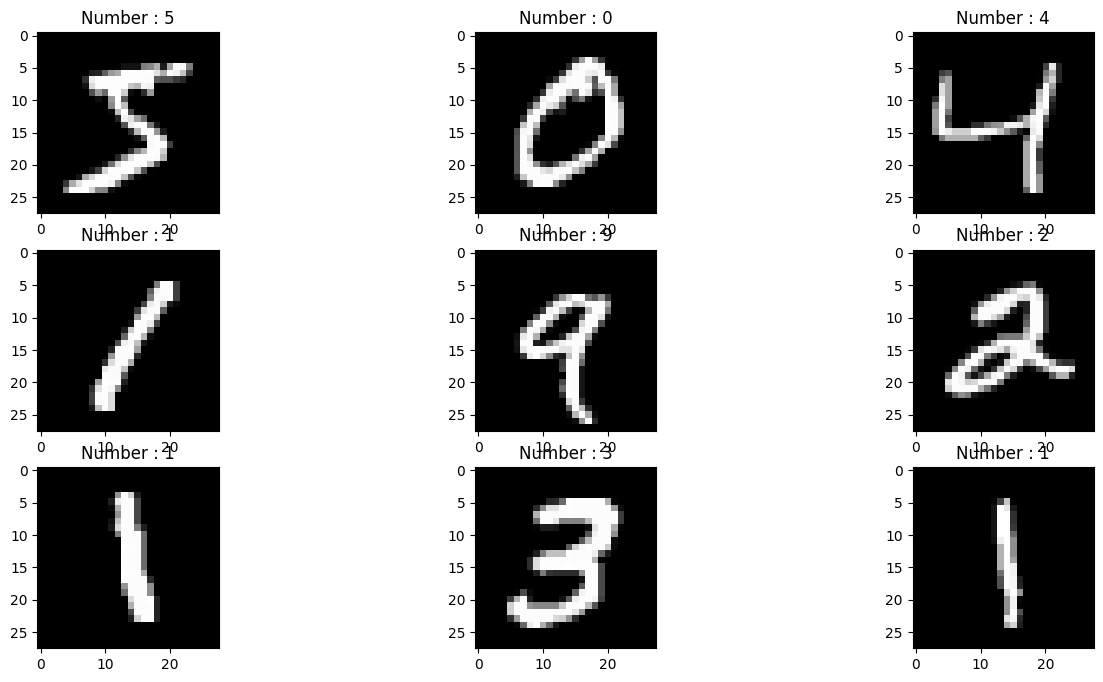

In [9]:
plt.figure(figsize=(16,8))
x = 1
for i in range(9):
    plt.subplot(3,3,x)
    x=x+1
    plt.imshow(xtrain[i],cmap='gray')
    plt.title(f'Number : {ytrain[i]}')

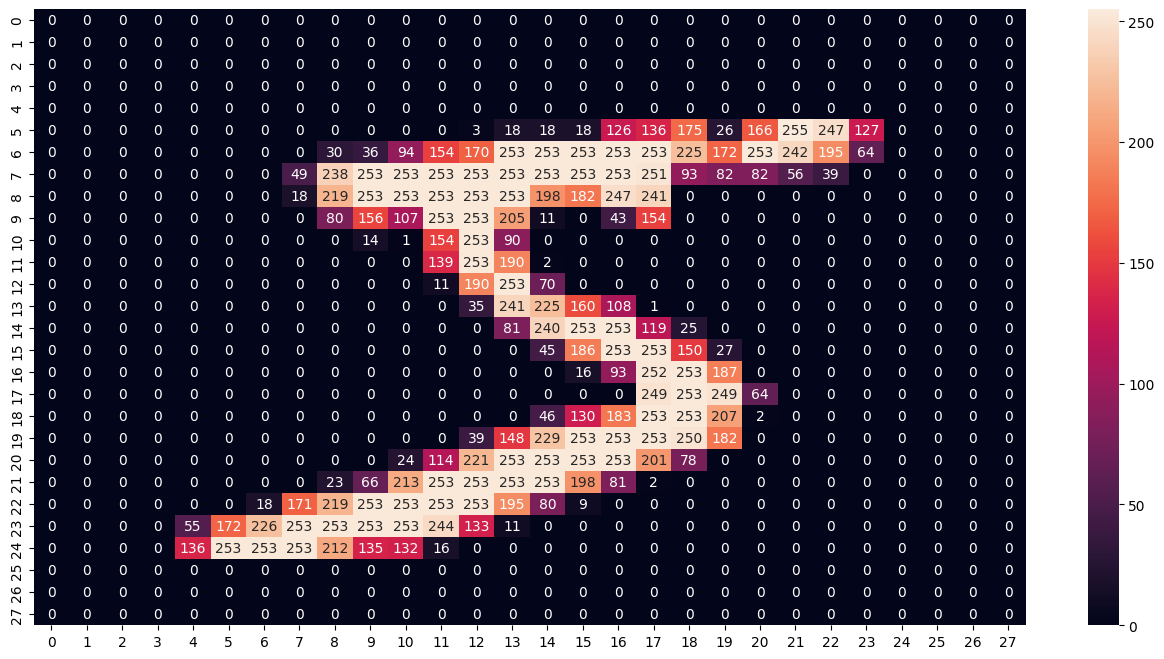

In [10]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.heatmap(xtrain[0],annot=True,fmt='d')
plt.show()

### Building CNN

In [18]:
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPool2D,BatchNormalization,Dropout,Flatten,Dense

In [19]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
## This is multiclass classification so do One Hot Enncoding
from keras.utils import to_categorical

ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)


In [14]:
ytrain_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
xtrain_scale = xtrain/255
xtest_scale = xtest/255

In [16]:
ytrain[0]

5

In [20]:
model = Sequential()

## Create convolutional layer 1
model.add(Convolution2D(16,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

## create convolution layer 2

model.add(Convolution2D(16,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

## Create a flatten layer

model.add(Flatten())

## Create Dense layer

model.add(Dense(units=256,activation='relu'))

## Create output layer

model.add(Dense(units=10,activation='softmax'))




## 

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)         

### Compile the model

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Fit the model

In [24]:
hist=model.fit(xtrain_scale,ytrain_cat,validation_split=0.2,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 23s 14ms/step - loss: 0.1341 - accuracy: 0.9577 - val_loss: 0.0541 - val_accuracy: 0.9843
Epoch 2/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0520 - accuracy: 0.9836 - val_loss: 0.0453 - val_accuracy: 0.9869
Epoch 3/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0391 - accuracy: 0.9880 - val_loss: 0.0411 - val_accuracy: 0.9886
Epoch 4/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0305 - accuracy: 0.9900 - val_loss: 0.0417 - val_accuracy: 0.9873
Epoch 5/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0263 - accuracy: 0.9911 - val_loss: 0.0403 - val_accuracy: 0.9888


### Plot he Learning curve

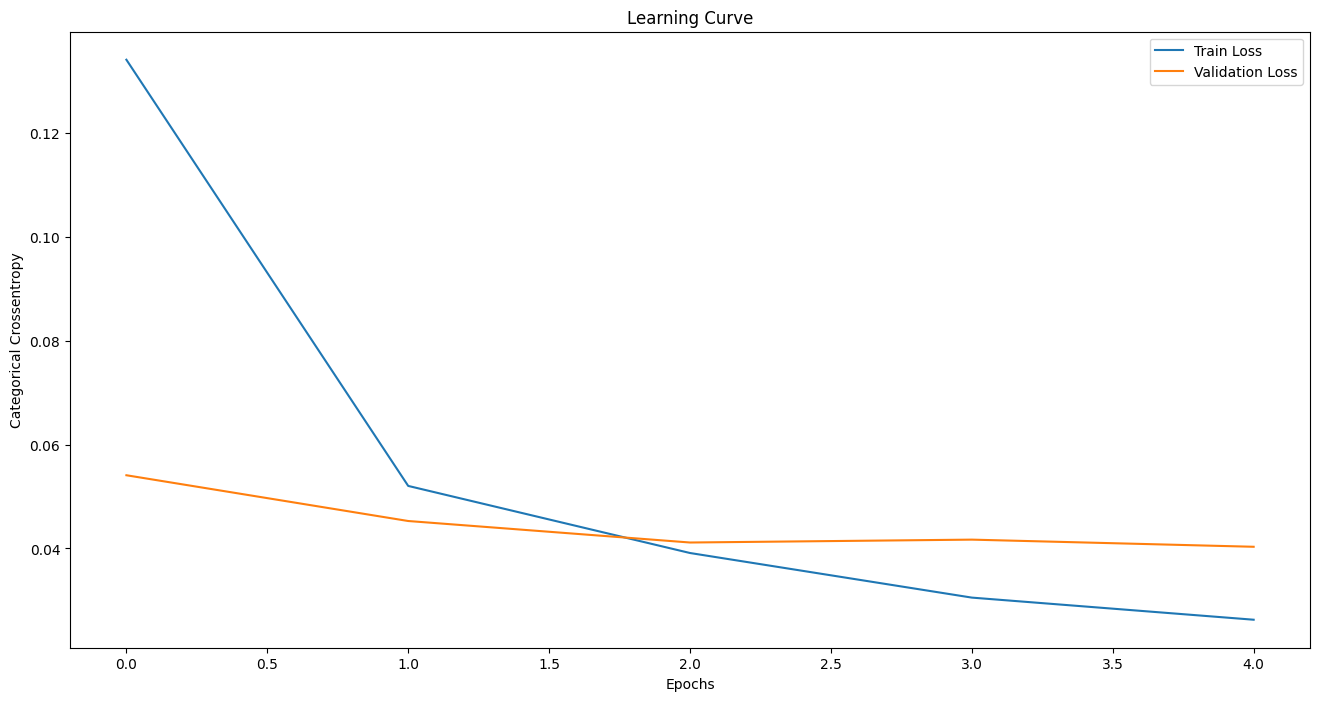

In [25]:
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Train Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Evaluate model in train test and train data

In [26]:
model.evaluate(xtrain_scale,ytrain_cat)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0179 - accuracy: 0.9945


[0.017898470163345337, 0.9945166707038879]

In [27]:
model.evaluate(xtest_scale,ytest_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.0367 - accuracy: 0.9896


[0.036694664508104324, 0.9896000027656555]

### Create confusion metrix

In [28]:
yprob_tr = model.predict(xtrain_scale)
yprob_ts = model.predict(xtest_scale)

313/313 [==============================] - 1s 4ms/step


In [29]:
yprob_tr[0]

array([7.3004932e-13, 8.4665443e-12, 1.2583187e-13, 9.9974066e-05,
       3.2795197e-16, 9.9989998e-01, 4.2091125e-10, 4.2004367e-13,
       9.8160265e-12, 5.7935662e-10], dtype=float32)

In [37]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [34]:
import numpy as np
ypred_tr =np.argmax(yprob_tr,axis=1)
ypred_ts = np.argmax(yprob_ts,axis=1)

In [36]:
ypred_tr[0:5]

array([5, 0, 4, 1, 9], dtype=int64)

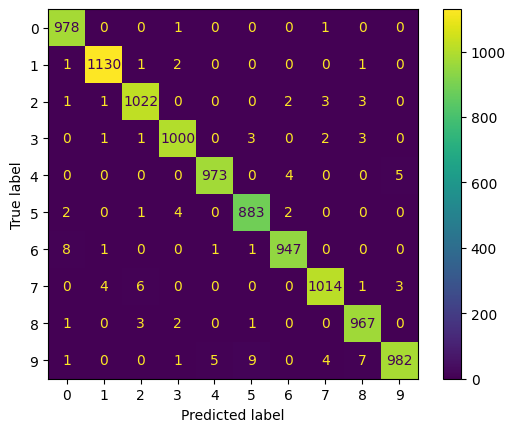

In [39]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### Print the classification

In [41]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts)) 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [42]:
model.save('handwrittenmodel.keras')

In [44]:
from keras.models import load_model
nn = load_model('handwrittenmodel.keras')
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)         